## Практическое занятие 5
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

#### Уравнение в форме $f(x)=0$

In [ ]:
import numpy as np
import sympy
from sympy import nsolve
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1
Решить уравнение $𝑥^4−e^x=0$ при $-2 \le x \le 2$, построить график левой части, отметить точки пересечения с осью ОХ.

(-10.0, 10.0)

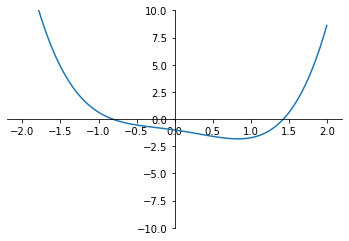

In [ ]:
from sympy.abc import x
X = np.linspace(-2, 2, 100)
plt.plot(X, X**4 - sympy.E**X)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.ylim(-10, 10)


In [ ]:
print(sympy.nsolve(x**4 - sympy.E**x, -1))
print(sympy.nsolve(x**4 - sympy.E**x, 1.5))

-0.815553418808961
1.42961182472556


### Задача 2.
Решить уравнение $\sin^2(2x)=\ln x$ при $0< x \le 3$. Построить графики левой и правой части, отметить точку пересечения графиков.

In [ ]:
def f(x, lib='sympy'):
    if lib == 'sympy':
        return sympy.sin(2 * x) ** 2
    if lib == 'numpy':
        return np.sin(2 * x) ** 2
    return 'error'

def g(x, lib='sympy'):
    if lib == 'sympy':
        return sympy.log(x)
    if lib == 'numpy':
        return np.log(x)
    return 'error'

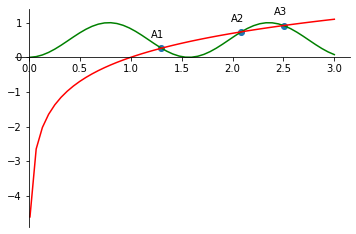

In [ ]:
roots = [sympy.nsolve(sympy.Eq(f(x, lib='sympy'), g(x, lib='sympy')), x, x0) for x0 in [1.5, 2, 2.5]]
X = np.linspace(0.01, 3)
ax = plt.gca() # get current axes - получить текущую систему координат
ax.plot(X, f(X, lib='numpy'), color='green')
ax.plot(X, g(X, lib='numpy'), color='red')
y_coord = [f(float(root), lib='numpy') for root in roots]
ax.scatter(roots, y_coord)
for i, x_coord in enumerate(roots):
    ax.annotate('A' + str(i + 1),
        xy=(x_coord, y_coord[i]), xycoords='data',
        xytext=(x_coord - 0.1, y_coord[i] + 0.3), textcoords='data') 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

### Задача 3.
Решить уравнение $\sin^2(2x^2-7x+6)=3/4$ на $[3, 4]$. Построить графики левой и правой части, отметить точки пересечения графиков.

In [ ]:
def f(x, lib='sympy'):
    if lib == 'sympy':
        return sympy.sin(2 * x ** 2 - 7 * x + 6) ** 2
    if lib == 'numpy':
        return np.sin(2 * x ** 2 - 7 * x + 6) ** 2
    return 'error'

def g(x):
    return 0 * x + 0.75

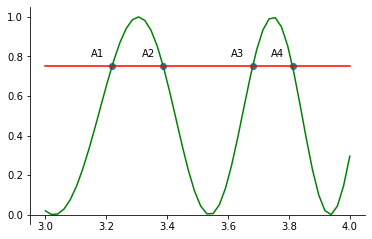

In [ ]:
roots = [sympy.nsolve(sympy.Eq(f(x, lib='sympy'), g(x)), x, x0) for x0 in [3, 3.4, 3.5, 3.55]]
X = np.linspace(3, 4)
ax = plt.gca()
ax.plot(X, f(X, lib='numpy'), color='green')
ax.plot(X, g(X), color='red')
y_coord = [f(float(root), lib='numpy') for root in roots]
ax.scatter(roots, y_coord)
for i, x_coord in enumerate(roots):
    ax.annotate('A' + str(i + 1),
        xy=(x_coord, y_coord[i]), xycoords='data',
        xytext=(x_coord - 0.07, y_coord[i] + 0.05), textcoords='data') 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))

### Задача 4.
Решить уравнение ${\rm tg}^4(2x^2+1)-10=0$ на интервале $[0, 0.2]$ методом дихотомии. График строить не нужно.

In [ ]:
def f(x):
    return sympy.tg(2 * x ** 2 + 1) ** 4 - 10

In [ ]:
roots = sympy.nsolve(sympy.Eq(f(x), 0 * x), x,
 [0, 0.2], solver='bisect', verify=False)
roots

AttributeError: module 'sympy' has no attribute 'tg'

### Задача 5.
Решить систему уравнений 
$$
\left\{\begin{matrix}
(x - 1)^2 + (y - 2)^2 + (z + 3)^2 = 25\\
x + y + z = 0\\
-2x + 3y - z = 7
\end{matrix}\right.
$$
начальное приближение (0, 0, 0).
Проверить подстановкой.

In [ ]:
from sympy import symbols, linsolve
x, y, z = symbols('x y z')
System_eq = [x + y + z, -2 * x + 3 * y - z - 7]
for i in linsolve(System_eq, x, y, z):
    a = i
eq = (x - 1) ** 2 + (y - 2) ** 2 + (z + 3) ** 2
eqs = eq.subs({x: a[0], y: a[1]})
z1 = sympy.nsolve(sympy.Eq(eqs, 25), z, 0)
x1 = a[0].subs({z: z1})
y1 = a[1].subs({z: z1})
x1, y1, z1

(-2.08606699924184, 1.22848325018954, 0.857583749052298)

In [ ]:
print(eq.subs({x: x1, y: y1, z: z1}),
  System_eq[0].subs({x: x1, y: y1, z: z1}),
  System_eq[1].subs({x: x1, y: y1, z: z1}))

25.0000000000000 -2.22044604925031e-16 2.22044604925031e-16


### Индивидуальное задание
Построить графики функций $f(x)$ и $g(x)$, уточнить координаты точек пересечения, решая численно соответствующее уравнение. На  графике отметить и подписать буквами $А_1$, $A_2$, ... точки пересечения графиков.  

\begin{align*}
 f(x) = \frac{x^{2}}{4} + 3 x + 13\\
 g(x) = \frac{7 x^{2}}{4} + 9 x + 13
\end{align*}

In [ ]:
def f(x):
    return x ** 2 / 4 + 3 * x + 13

def g(x):
    return 7 * x ** 2 / 4 + 9 * x + 13

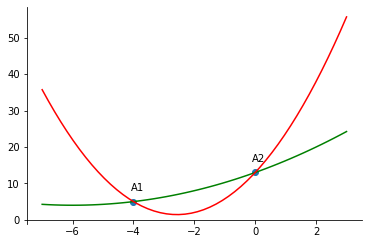

In [ ]:
roots = [sympy.nsolve(sympy.Eq(f(x), g(x)), x, x0) for x0 in [-4, 0]]
X = np.linspace(-7, 3)
ax = plt.gca()
ax.plot(X, f(X), color='green')
ax.plot(X, g(X), color='red')
y_coord = [f(float(root)) for root in roots]
ax.scatter(roots, y_coord)
for i, x_coord in enumerate(roots):
    ax.annotate('A' + str(i + 1),
        xy=(x_coord, y_coord[i]), xycoords='data',
        xytext=(x_coord - 0.1, y_coord[i] + 3), textcoords='data') 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))